In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import glob

files = glob.glob("*.csv")
for i in range(len(files)):
    print(files[i])
    
adat = pd.read_csv("MoCap/sub01_futas.csv")
#adat = pd.read_csv("probameres1.csv")
lower = 0
upper = adat['Time'][(adat['Time'].size)-1]

also_x = adat['X.6']
also_y = adat['Y.6']
also_z = adat['Z.6']

#felso_x = adat['X.1']
##felso_y = adat['Y.1']
#felso_z = adat['Z.1']

also_x = adat['X']
also_y = adat['Y']
also_z = adat['Z']
print(also_x[0])

adat.head(1)

probameres1.csv
-0.166605


,Frame,Time,X,Y,Z,W,X.1,Y.1,Z.1,Unnamed: 9,...,Z.12,X.13,Y.13,Z.13,X.14,Y.14,Z.14,X.15,Y.15,Z.15
0,0,0.0,-0.166605,-0.898357,0.158661,-0.374199,0.59186,1.015404,0.821542,0.000454,...,0.837576,0.570985,0.964323,0.781619,0.581293,1.043302,0.897366,0.623301,1.038588,0.785642


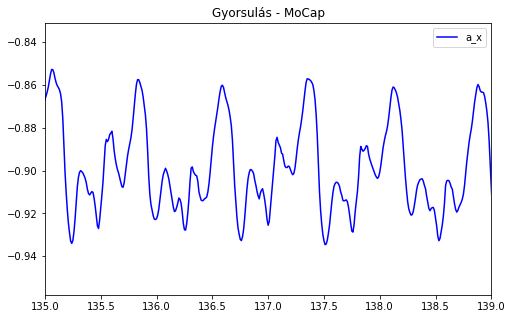

In [36]:
time = adat['Time']
lower = 0;
#upper = time;
lower = 135
upper = 139
index = adat['Time'].size

y = also_y
x = time

plt.figure(figsize=(8,5))
plt.plot(x, y, 'b')
plt.xlim(lower, upper)
plt.legend(['a_x', 'True'])
plt.title('Gyorsulás - MoCap')
plt.show()

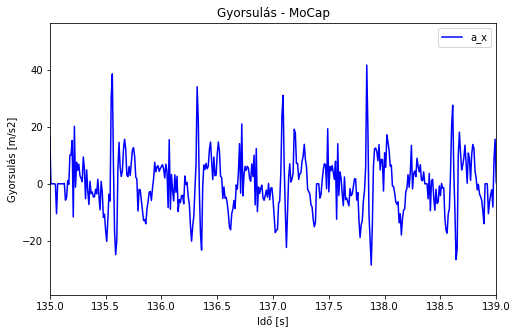

In [40]:
d_adat_x = (adat['X.6'] - adat['X.6'].shift(1))/(adat['Time'] - adat['Time'].shift(1))
d_adat_y = (adat['Y.6'] - adat['Y.6'].shift(1))/(adat['Time'] - adat['Time'].shift(1))
d_adat_z = (adat['Z.6'] - adat['Z.6'].shift(1))/(adat['Time'] - adat['Time'].shift(1))

d2_adat_x = (d_adat_x - d_adat_x.shift(1))/(adat['Time'] - adat['Time'].shift(1))
d2_adat_y = (d_adat_y - d_adat_y.shift(1))/(adat['Time'] - adat['Time'].shift(1))
d2_adat_z = (d_adat_z - d_adat_z.shift(1))/(adat['Time'] - adat['Time'].shift(1))


y = d2_adat_y
x = time

for i in range(0, index):
    if np.isnan(y[i]):
        y[i] = 0.0

plt.figure(figsize=(8,5))
plt.plot(x, y, 'b')
plt.xlim(lower, upper)
plt.legend(['a_x', 'True'])
plt.title('Gyorsulás - MoCap')
plt.xlabel('Idő [s]')
plt.ylabel('Gyorsulás [m/s2]')
plt.show()

f = open("korr_mocap.txt", "w")
for i in range(10840, 11120):
    tostr = str(y[i]) + ","
    f.write(tostr)
f.close()

In [28]:
import derivative
l = 601
pont = 14
sg = derivative.SavitzkyGolay(left=.5, right=.5, order=2, periodic=True)

x_d = sg.d(also_x.values.flatten(), np.arange(l))
y_d = sg.d(also_y.values.flatten(), np.arange(l))
z_d = sg.d(also_z.values.flatten(), np.arange(l))

ValueError: Desired X axis size does not match t size.